In [109]:
!pip install pandas matplotlib wordcloud

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [111]:
df1 = pd.read_csv('C:\\Users\\angie\\OneDrive\\Desktop\\Jupyter\\raw files\\Remote Working Survey\\2020_rws.csv', encoding='latin-1')
df2 = pd.read_csv('C:\\Users\\angie\\OneDrive\\Desktop\\Jupyter\\raw files\\Remote Working Survey\\2021_rws.csv', encoding='latin-1')
#  a UnicodeDecodeError, indicating an issue with decoding the CSV file using the 'utf-8' encoding. This error usually occurs when the file contains non-UTF-8 encoded characters - these characters may come from different character encodings, such as ASCII, Latin-1 (ISO 8859-1), Windows-1252, UTF-16, etc
# Special characters with accents or diacritics: Characters like "é", "ü", "ñ", or "à" that have accents or diacritics are non-UTF-8 encoded characters if they are not represented using the appropriate Unicode code point.
# Symbolic characters: Certain symbols or currency signs, such as the British pound sign "£", the Euro symbol "€", or mathematical symbols like "±" or "∑", might be non-UTF-8 encoded characters if they are not represented using their respective Unicode code points.
# Emoticons and emoji: Some emoticons or emoji, particularly older or less common ones, may not be part of the UTF-8 character set and could be considered non-UTF-8 encoded characters.
# Rare or ancient characters: Certain characters from ancient scripts or less widely used writing systems might not be included in the UTF-8 character set and would be considered non-UTF-8 encoded characters.

In [112]:
df1.columns

Index(['Response ID', 'What year were you born?', 'What is your gender?',
       'Which of the following best describes your industry?',
       'Which of the following best describes your industry? (Detailed)',
       'Which of the following best describes your current occupation?',
       'Which of the following best describes your current occupation? (Detailed)',
       'How many people are currently employed by your organisation?',
       'Do you manage people as part of your current occupation?',
       'Which of the following best describes your household?',
       'How long have you been in your current job?', 'Metro / Regional',
       'Thinking about your current job, how much of your time did you spend remote working last year?',
       'Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - My organisation encouraged people to work remotely',
       'Thinking about remote working last year, how strongly do you agree or 

In [113]:
# Assuming you have loaded your dataset into a DataFrame called df1

# Create a dictionary to map current column names to new names (renamed all columns I wanted to keep)
new_column_names = {
    'Response ID': 'Response ID',
    'What year were you born?': 'Year of Birth',
    'What is your gender?': 'Gender',
    'Which of the following best describes your industry?': 'Industry',
    'Which of the following best describes your industry? (Detailed)': 'Industry Details',
    'Which of the following best describes your current occupation?': 'Occupation',
    'Which of the following best describes your current occupation? (Detailed)': 'Occupation Details',
    'How many people are currently employed by your organisation?': 'Number Employees',
    'Do you manage people as part of your current occupation?': 'Manage Ppl',
    'Which of the following best describes your household?': 'Household',
    'How long have you been in your current job?': 'Length current Job',
    'Metro / Regional': 'Metro / Regional',
    'Thinking about your current job, how much of your time did you spend remote working last year?': 'Remote Time',
    'Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - My organisation encouraged people to work remotely': 'Encourages Remote Work',
    'Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - My organisation was well prepared for me to work remotely': 'Prepared for Remote',
    'Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - It was common for people in my organisation to work remotely': 'Remote Work is common',
    'Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - It was easy to get permission to work remotely': 'Easy Permission for Remote',
    'Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - I could easily collaborate with colleagues when working remotely': 'Easy Collaboration',
    'Thinking about remote working last year, how strongly do you agree or disagree with the following statements? - I would recommend remote working to others': 'Recommend Remote',
    'How much of your time would you have preferred to work remotely last year?': 'Preferred Remote Time',
    'Thinking about your current job, how much of your time did you spend remote working in the last 3 months?': 'Remote Time last 3 Months',
    'From the following, please select the most significant barrier to doing your work remotely - Connectivity (internet connection) ; Feeling left out and/or isolated ; Poor management ; IT equipment (computer, printer, etc.) ; Difficulty collaborating remotely ; Caring responsibilities': 'Barrier1 doing Remote Work',
    'From the following, please select the most significant barrier to doing your work remotely - Connectivity (internet connection) ; Feeling left out and/or isolated ; Poor management ; Cyber security ; Lack of motivation ; Lack of motivation': 'Barrier2 doing Remote Work',
    'From the following, please select the least significant barrier to doing your work remotely - Connectivity (internet connection) ; Feeling left out and/or isolated ; Poor management ; Lack of remote working skills ; My living situation (e.g. location, home size, who I live with) ; Management discourages remote working': 'Barrier3 doing Remote Work',
    'From the following, please select the most significant barrier to doing your work remotely - IT equipment (computer, printer, etc.) ; Difficulty collaborating remotely ; Caring responsibilities ; Cyber security ; Lack of motivation ; Lack of motivation': 'Barrier4 doing Remote Work'
}

# Rename the columns using the rename() function
df1 = df1.rename(columns=new_column_names)
df2 = df2.rename(columns=new_column_names)

In [114]:
df1.head(10)

,Response ID,Year of Birth,Gender,Industry,Industry Details,Occupation,Occupation Details,Number Employees,Manage Ppl,Household,...,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing ; My daily expenses ; My personal relationships ; My job satisfaction
0,1,1972,Female,Manufacturing,Food Product Manufacturing,Clerical and administrative,Other Clerical and Administrative,Between 20 and 199,No,Couple with no dependent children,...,Managing my personal commitments,My opportunities to socialise,Preparing for work and commuting,My working relationships,Managing my personal commitments,The number of hours I work,My job satisfaction,The number of hours I work,Managing my personal commitments,My opportunities to socialise
1,2,1972,Male,Wholesale Trade,Other Goods Wholesaling,Managers,"Chief Executives, General Managers and Legisla...",Between 1 and 4,Yes,Couple with dependent children,...,Preparing for work and commuting,My working relationships,Preparing for work and commuting,My working relationships,My work-life balance,My on-the-job learning opportunities,My work-life balance,My on-the-job learning opportunities,My personal relationships,My opportunities to socialise
2,3,1982,Male,"Electricity, Gas, Water and Waste Services",Gas Supply,Managers,"Chief E

In [115]:
# Drop columns by indexing
columns_to_keep = ['Response ID', 'Year of Birth', 'Gender', 'Industry',
       'Industry Details', 'Occupation', 'Occupation Details',
       'Number Employees', 'Manage Ppl', 'Household', 'Length current Job',
       'Metro / Regional', 'Remote Time', 'Encourages Remote Work',
       'Prepared for Remote', 'Remote Work is common',
       'Easy Permission for Remote', 'Easy Collaboration', 'Recommend Remote',
       'Preferred Remote Time', 'Remote Time last 3 Months','Barrier1 doing Remote Work','Barrier2 doing Remote Work','Barrier3 doing Remote Work','Barrier4 doing Remote Work']
df1 = df1[columns_to_keep] # specifies the names of the columns I want to keep in the columns_to_keep list. By indexing the DataFrame with this list, I am creating a new DataFrame that includes only the specified columns

# Note to myself: dropping columns using drop() or indexing with square brackets creates a new DataFrame with the specified columns removed
# If I want to modify the DataFrame in-place without creating a new DataFrame - set the inplace parameter to True in the drop() function, like this: df1.drop(columns=columns_to_drop, inplace=True)

In [116]:
df1.head(10)

,Response ID,Year of Birth,Gender,Industry,Industry Details,Occupation,Occupation Details,Number Employees,Manage Ppl,Household,...,Remote Work is common,Easy Permission for Remote,Easy Collaboration,Recommend Remote,Preferred Remote Time,Remote Time last 3 Months,Barrier1 doing Remote Work,Barrier2 doing Remote Work,Barrier3 doing Remote Work,Barrier4 doing Remote Work
0,1,1972,Female,Manufacturing,Food Product Manufacturing,Clerical and administrative,Other Clerical and Administrative,Between 20 and 199,No,Couple with no dependent children,...,NaN,NaN,NaN,NaN,I would not have preferred to work remotely,90%,Difficulty collaborating remotely,Connectivity (internet connection),"My living situation (e.g. location, home size,...",Lack of motivation
1,2,1972,Male,Wholesale Trade,Other Goods Wholesaling,Managers,"Chief Executives, General Managers and Legisla...",Between 1 and 4,Yes,Couple with dependent children,...,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,20%,20%,"IT equipment (computer, printer, etc.)",Connectivity (internet connection),Feeling left out and/or isolated,"IT equipment (computer, printer, etc.)"
2,3,1982,Male,"Electricity, Gas, Water and Waste Services",Gas Supply,Managers,"Chief Executives, General Managers and Legisla...",More than 200,Yes,One parent family with dependent children,...,Neither agree nor disagree,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,50% - About half of my time,50% - I spent about half of my time remote wor...,Difficulty collaborating remotely,Poor management,"My living situation (e.g. location, home size,...",Caring responsibilities
3,4,1987,Female,"Professional, Scientific and Technical Services","Professional, Scientific and Technical Services",Professionals,ICT Professionals,Between 20 and 199,No,Couple with dependent children,...,Somewhat disagree,Somewhat disagree,Somewhat agree,Somewhat agree,50% - About half of my time,100% - I spent all of my time remote working,Feeling left out and/or isolated,Cyber security,"My living situation (e.g. location, home size,...",Lack of motivation
4,5,1991,Male,"Transport, Postal and Warehousing",Other Transport,Managers,Specialist Managers,Between 5 and 19,Yes,Couple with no dependent children,...,Somewhat disagree,Strongly disagree,Strongly agree,Somewhat agree,60%,90%,Poor management,Poor management,Connectivity (internet connection),Caring responsibilities
5,6,1989,Male,Retail Trade,Food Retailing,Sales,Sales Support,Between 20 and 199,No,Single person,...,Somewhat agree,Strongly agree,Strongly agree,Strongly agree,40%,70%,Feeling left out and/or isolated,Feeling left out and/or isolated,"My living situation (e.g. location, home size,...",Lack of motivation
6,7,1973,Male,Financial and Insurance Services,Finance,Clerical and administrative,General Clerical,More than 200,No,Couple with dependent children,...,NaN,NaN,NaN,NaN,70%,100% - I spent all of my time remote working,Poor management,Connectivity (internet connection),Feeling left out and/or isolated,Cyber security
7,8,1992,Male,Manufacturing,Polymer Product and Rubber Product Manufacturing,Managers,"Chief Executives, General Managers and Legisla...",Between 5 and 19,Yes,Couple with dependent children,...,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,90%,90%,Caring responsibilities,Connectivity (internet connection),Connectivity (internet connection),Lack of motivation
8,9,1977,Male,Administrative and Support Services,Administrative Services,Clerical and administrative,General Clerical,More than 200,No,Single person,...,Neither agree nor disagree,Somewhat agree,Somewhat agree,Somewhat agree,60%,60%,Poor management,Poor management,Lack of remote working skills,Caring responsibilities
9,10,1985,Male,"Electricity, Gas, Water and Waste Services",Gas Supply,Managers,Specialist Managers,More than 200,No,Group household,...,Somewhat disagree,Neither agree nor disagree,Somewhat agree,Neither agree nor disagree,20%,40%,Feeling left out and/or isola

In [117]:
# Check for null values - in case there are Null values use: df1 = df1.replace('null_value', np.nan)
null_values = df1.isnull()
print(null_values)

      Response ID  Year of Birth  Gender  Industry  Industry Details  \
0           False          False   False     False             False   
1           False          False   False     False             False   
2           False          False   False     False             False   
3           False          False   False     False             False   
4           False          False   False     False             False   
...           ...            ...     ...       ...               ...   
1502        False          False   False     False             False   
1503        False          False   False     False             False   
1504        False          False   False     False             False   
1505        False          False   False     False             False   
1506        False          False   False     False             False   

      Occupation  Occupation Details  Number Employees  Manage Ppl  Household  \
0          False               False             False

In [118]:
# Drop rows with NaN values - not useful for wordcloud
df1 = df1.dropna()

In [119]:
# Concatenate text data from multiple columns into a single column (Multiple Barriers combined)
df1['Barriers'] = df1['Barrier1 doing Remote Work'].str.cat([df1['Barrier2 doing Remote Work'], df1['Barrier3 doing Remote Work'], df1['Barrier4 doing Remote Work']], sep=' ')

In [120]:
df1.head(10)

,Response ID,Year of Birth,Gender,Industry,Industry Details,Occupation,Occupation Details,Number Employees,Manage Ppl,Household,...,Easy Permission for Remote,Easy Collaboration,Recommend Remote,Preferred Remote Time,Remote Time last 3 Months,Barrier1 doing Remote Work,Barrier2 doing Remote Work,Barrier3 doing Remote Work,Barrier4 doing Remote Work,Barriers
1,2,1972,Male,Wholesale Trade,Other Goods Wholesaling,Managers,"Chief Executives, General Managers and Legisla...",Between 1 and 4,Yes,Couple with dependent children,...,Somewhat agree,Somewhat agree,Somewhat agree,20%,20%,"IT equipment (computer, printer, etc.)",Connectivity (internet connection),Feeling left out and/or isolated,"IT equipment (computer, printer, etc.)","IT equipment (computer, printer, etc.) Connect..."
2,3,1982,Male,"Electricity, Gas, Water and Waste Services",Gas Supply,Managers,"Chief Executives, General Managers and Legisla...",More than 200,Yes,One parent family with dependent children,...,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,50% - About half of my time,50% - I spent about half of my time remote wor...,Difficulty collaborating remotely,Poor management,"My living situation (e.g. location, home size,...",Caring responsibilities,Difficulty collaborating remotely Poor managem...
3,4,1987,Female,"Professional, Scientific and Technical Services","Professional, Scientific and Technical Services",Professionals,ICT Professionals,Between 20 and 199,No,Couple with dependent children,...,Somewhat disagree,Somewhat agree,Somewhat agree,50% - About half of my time,100% - I spent all of my time remote working,Feeling left out and/or isolated,Cyber security,"My living situation (e.g. location, home size,...",Lack of motivation,Feeling left out and/or isolated Cyber securit...
4,5,1991,Male,"Transport, Postal and Warehousing",Other Transport,Managers,Specialist Managers,Between 5 and 19,Yes,Couple with no dependent children,...,Strongly disagree,Strongly agree,Somewhat agree,60%,90%,Poor management,Poor management,Connectivity (internet connection),Caring responsibilities,Poor management Poor management Connectivity (...
5,6,1989,Male,Retail Trade,Food Retailing,Sales,Sales Support,Between 20 and 199,No,Single person,...,Strongly agree,Strongly agree,Strongly agree,40%,70%,Feeling left out and/or isolated,Feeling left out and/or isolated,"My living situation (e.g. location, home size,...",Lack of motivation,Feeling left out and/or isolated Feeling left ...
7,8,1992,Male,Manufacturing,Polymer Product and Rubber Product Manufacturing,Managers,"Chief Executives, General Managers and Legisla...",Between 5 and 19,Yes,Couple with dependent children,...,Somewhat agree,Somewhat agree,Somewhat agree,90%,90%,Caring responsibilities,Connectivity (internet connection),Connectivity (internet connection),Lack of motivation,Caring responsibilities Connectivity (internet...
8,9,1977,Male,Administrative and Support Services,Administrative Services,Clerical and administrative,General Clerical,More than 200,No,Single person,...,Somewhat agree,Somewhat agree,Somewhat agree,60%,60%,Poor management,Poor management,Lack of remote working skills,Caring responsibilities,Poor management Poor management Lack of remote...
9,10,1985,Male,"Electricity, Gas, Water and Waste Services",Gas Supply,Managers,Specialist Managers,More than 200,No,Group household,...,Neither agree nor disagree,Somewhat agree,Neither agree nor disagree,20%,40%,Feeling left out and/or isolated,Lack of motivation,Poor management,Lack of motivation,Feeling left out and/or isolated Lack of motiv...
12,13,1994,Female,Financial and Insurance Services,Insurance and Superannuation Funds,Professionals,"Business, Human Resource and Marketing Profess...",More than 200,No,Single person,...,Strongly agree,Somewhat agree,Somewhat agree,50% - About half of my time,100% - I spent all of my time remote working,Connectivity (internet connection),Connectivity (internet connection),"My living situation (e.g. loc

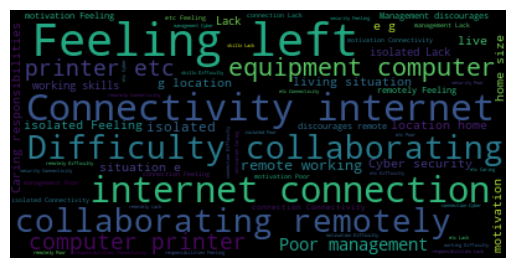

In [121]:
# Concatenate text data from the "Barriers" column
text = df1['Barriers'].dropna().str.cat(sep=' ')

# Generate word cloud
wordcloud = WordCloud().generate(text)

# Display the word cloud
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Note to me: # compare both wordclouds
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(wordcloud1, interpolation='bilinear')
axes[0].set_title('Dataset 1')
axes[0].axis('off')

axes[1].imshow(wordcloud2, interpolation='bilinear')
axes[1].set_title('Dataset 2')
axes[1].axis('off')

plt.show()

In [122]:
# Remove the space at the end of the column name - catious use df2.columns to make sure there is no additional spaces in column names!
df2.rename(columns=lambda x: x.rstrip(), inplace=True)


In [123]:
# Rename the columns using the rename() function
df2 = df2.rename(columns=new_column_names)

In [124]:
df2.columns # column names in second data set differ significantly from the first one!

Index(['Response ID', 'Year of Birth', 'Gender',
       'How long have you been in your current job?  If you have more than one job, please answer all questions for your main job.',
       'Industry', 'Occupation', 'Number Employees', 'Household',
       'Metro or Regional',
       'Thinking about your current job, how much of your work time did you spend working remotely in the last quarter of last year?   This means October-December 2020  If you work a 5 day week, each day of remote working equals 20% of your time.',
       ...
       'How strongly do you agree or disagree with the following statements?    - Offering remote work helps me retain employees',
       'How strongly do you agree or disagree with the following statements?    - Offering remote work helps me to recruit employees',
       'How strongly do you agree or disagree with the following statements?    - My team works well together when they work remotely',
       'How strongly do you agree or disagree with the followi